# Agenda

1. Background on polotting in Python/Pandas
2. Plotting with a series
    - line plot
    - bar plot
    - histogram
    - pie plot
    - boxplot
3. Plotting with a data frame
    - line
    - bar
    - histogram
    - pie plot
    - boxplot
4. Scatterplot
5. Tricks with plots
6. Seaborn

# Background on plotting

Matplotlib is powerful but hard. We can use Pandas to plot with it.

In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
s = Series([10, 20, 30, 40, 50, 30, 20, 50, 60])
s

0    10
1    20
2    30
3    40
4    50
5    30
6    20
7    50
8    60
dtype: int64

<Axes: >

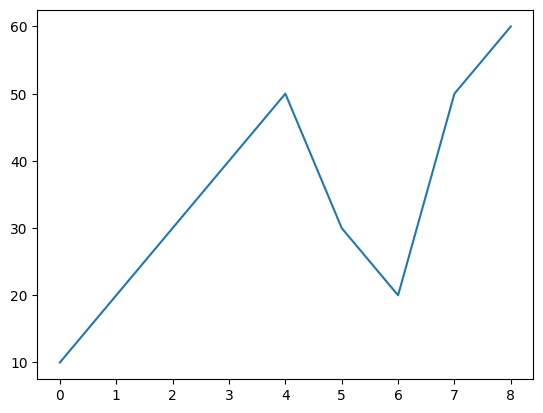

In [4]:
s.plot()